In [1]:
using DataFrames
using Plots
using CSV
using Statistics
using LinearAlgebra

In [2]:
df = CSV.read("iris.csv", DataFrame)
# The number of clusters
k = 3
df

Row,sepal_length,sepal_width,petal_length,petal_width,species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


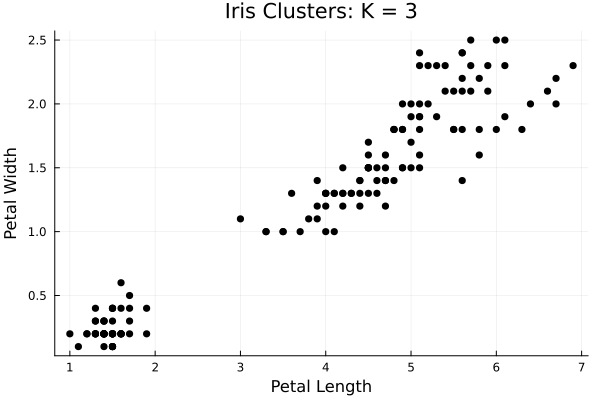

In [3]:
# Scatter plot of iris data
irisplot = scatter(df[:, 3], df[:, 4], color="black", xlabel="Petal Length", ylabel="Petal Width", label="", title="Iris Clusters: K = $k")
irisplot

In [4]:
# Calculates and returns the class of an object using the current centers, i.e, means
function classify(s_l, s_w, p_l, p_w)
    distances = Float64[]
    
    # For each class, adds the distance from this sample to the current mean
    for i in 1:k
        push!(distances, (means[i][1] - s_l)^2 + (means[i][2] - s_w)^2 + 
        (means[i][3] - p_l)^2 + (means[i][4] - p_w)^2)
    end
    
    mini = minimum(distances)
    
    for i in 1:k
        # Finds and returns the class of the closest mean
        # Also returns the distance to the mean
        if(mini == distances[i])
            return i, distances[i]
        end
    end
end

classify (generic function with 1 method)

In [5]:
# Initializes the cluster centers to random values
# Global variables
iterations = 0
means = Vector{Vector{Float64}}(undef, 0)
oldMeans = Vector{Vector{Float64}}(undef, 0)
distortions = Float64[]
Cluster = Array{Any}(undef, 3)

# For each class, initializes with a random mean
for i in 1:k
    push!(means, collect(df[i, 1:4]))
end

# inits oldMean's values
for i in 1:k
    push!(oldMeans, [-1, -1, -1, -1])
end

# Initial
for i in 1:k
    scatter!(irisplot, [means[i][3]], [means[i][4]], label="Initial", color="red", title="Iris Clusters: K = $k", legend=true)
end

println(means)
while (any(oldMeans .!= means))
    # Assigns each sample the species/class of its closest mean
    transform!(df, [:sepal_length, :sepal_width, :petal_length, :petal_width] => ByRow(classify) => [:class, :distance])

    # Creates/Remakes the clusters based on evaluated classes
    for i in 1:k
        Cluster[i] = filter(row -> (return row.class == i), df)
    end
        
    # Gets the old means to check for convergence
    oldMeans = copy(means)

    # Calculates the new means
    for i in 1:k
        means[i] = mean.(eachcol(Cluster[i][:, 1:4]))
    end
    iterations += 1
    # Stores the value of the distortion for this sample
    push!(distortions, sum(df[:, :distance]))
        
    # Intermediate cluster means
    if iterations == 6
        for i in 1:k
            scatter!(irisplot, [means[i][3]], [means[i][4]], label="Intermediate", title="Iris Clusters: K = $k", color="blue", legend=true)
        end
    end
end

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2]]


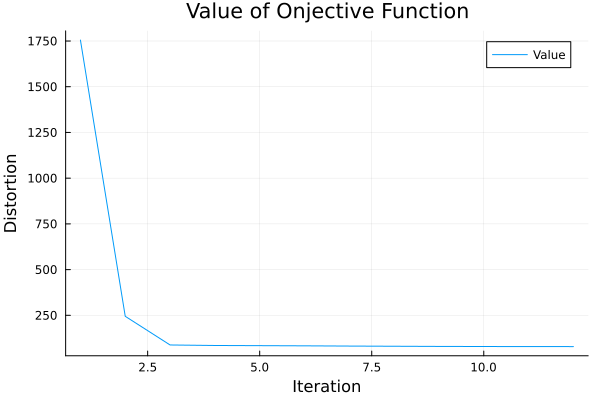

In [6]:
# 1b)
distortionplot = plot(1:iterations, distortions, xlabel="Iteration", ylabel="Distortion", label="Value", title="Value of Onjective Function")
distortionplot

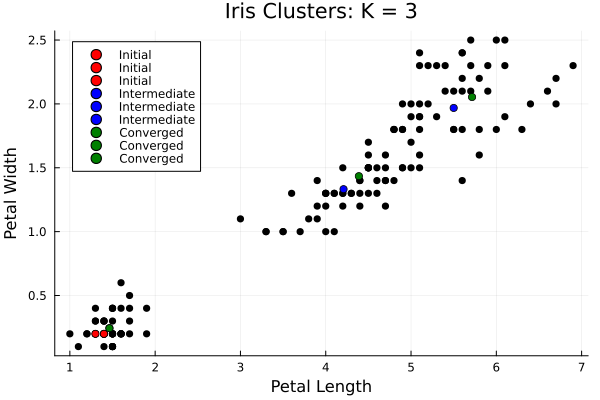

In [7]:
# Converged
for i in 1:k
    scatter!(irisplot, [means[i][3]], [means[i][4]], label="Converged", color="green", title="Iris Clusters: K = $k", legend=true)
end
irisplot

In [8]:
means

3-element Vector{Vector{Float64}}:
 [6.853846153846153, 3.076923076923077, 5.715384615384615, 2.0538461538461537]
 [5.88360655737705, 2.740983606557377, 4.388524590163935, 1.4344262295081969]
 [5.006, 3.418, 1.4639999999999997, 0.244]

In [9]:
midpoint1 = (3means[2][3:4] - means[3][3:4]) / 2
midpoint2 = (3means[1][4] - means[2][4]) / 2
slope1 = -(means[2][3] - means[3][3]) / (means[2][4] - means[3][4])
slope2 = -(means[1][3] - means[2][3]) / (means[1][4] - means[2][4])

yintercept1 = midpoint1[2] - midpoint1[1]/slope1
yintercept2 = midpoint2[2] - midpoint2[1]/slope2

line1(x) = x * slope1 + yintercept1
line2(x) = x * slope2 + yintercept2
plot!(irisplot, line1, label="Decision Boundary 1")
plot!(irisplot, line2, label="Decision Boundary 2")
display(irisplot)

LoadError: BoundsError

In [10]:
midpoint1

2-element Vector{Float64}:
 5.850786885245902
 2.0296393442622955

In [11]:
midpoint2

2.363556116015132